In [27]:
# =========================================================
# AG NEWS CLASSIFICATION NOTEBOOK (STEP 1 & STEP 2)
# Baseline Model: TF-IDF + Logistic Regression
# =========================================================

!pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)


In [28]:
# Load your AG News CSV (change path if needed)
df = pd.read_csv("/kaggle/input/dataset/test.csv")


df.head()


,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [29]:

df.rename(columns={
    "Class Index": "label",
    "Title": "title",
    "Description": "description"
}, inplace=True)

df["text"] = df["title"] + " " + df["description"]

df.head()


,label,title,description,text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,Fears for T N pension after talks Unions repre...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",The Race is On: Second Private Team Sets Launc...
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,Ky. Company Wins Grant to Study Peptides (AP) ...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,Prediction Unit Helps Forecast Wildfires (AP) ...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,Calif. Aims to Limit Farm-Related Smog (AP) AP...


In [30]:
print(df.shape)
df['label'].value_counts()


(7600, 4)


label
3    1900
4    1900
2    1900
1    1900
Name: count, dtype: int64

In [31]:
df['text'] = df['title'] + " " + df['description']
df = df[['text', 'label']]
df.head()


,text,label
0,Fears for T N pension after talks Unions repre...,3
1,The Race is On: Second Private Team Sets Launc...,4
2,Ky. Company Wins Grant to Study Peptides (AP) ...,4
3,Prediction Unit Helps Forecast Wildfires (AP) ...,4
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,4


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)


In [33]:
vectorizer = TfidfVectorizer(
    max_features=50000,
    stop_words='english'
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [34]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=2000)

In [35]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8881578947368421

Classification Report:

              precision    recall  f1-score   support

           1       0.88      0.89      0.89       373
           2       0.93      0.97      0.95       389
           3       0.86      0.85      0.86       359
           4       0.88      0.84      0.86       399

    accuracy                           0.89      1520
   macro avg       0.89      0.89      0.89      1520
weighted avg       0.89      0.89      0.89      1520



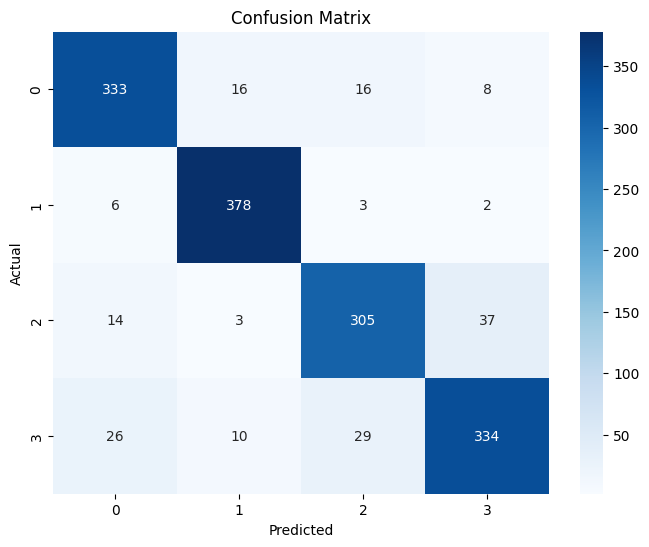

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [37]:
sample_texts = [
    "NASA launches new spacecraft into orbit",
    "Apple releases quarterly financial report",
    "Manchester United wins championship",
    "New breakthrough in quantum computing"
]

sample_vec = vectorizer.transform(sample_texts)
sample_pred = model.predict(sample_vec)

for text, label in zip(sample_texts, sample_pred):
    print(f"\nTEXT: {text}\nPREDICTED CLASS: {label}")



TEXT: NASA launches new spacecraft into orbit
PREDICTED CLASS: 4

TEXT: Apple releases quarterly financial report
PREDICTED CLASS: 4

TEXT: Manchester United wins championship
PREDICTED CLASS: 2

TEXT: New breakthrough in quantum computing
PREDICTED CLASS: 4


# MODEL

In [38]:
!pip install transformers datasets accelerate -q
!pip install seaborn -q
import os
import pandas as pd
import numpy as np


In [39]:
import os
for root, dirs, files in os.walk("/kaggle/input"):
    print(root, files)


/kaggle/input []
/kaggle/input/ag-news-classification-dataset ['train.csv', 'test.csv']
/kaggle/input/dataset ['test.csv']


In [40]:
import pandas as pd

DATA_FOLDER = "/kaggle/input/ag-news-classification-dataset"

train_df = pd.read_csv(f"{DATA_FOLDER}/train.csv")
test_df  = pd.read_csv(f"{DATA_FOLDER}/test.csv")

train_df.rename(columns={
    "Class Index": "label",
    "Title": "title",
    "Description": "description"
}, inplace=True)

test_df.rename(columns={
    "Class Index": "label",
    "Title": "title",
    "Description": "description"
}, inplace=True)

train_df["text"] = train_df["title"] + " " + train_df["description"]
test_df["text"]  = test_df["title"] + " " + test_df["description"]

train_df["label"] = train_df["label"] - 1
test_df["label"]  = test_df["label"] - 1

train_df.head()


,label,title,description,text
0,2,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,2,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,2,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,2,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


## 1) Setup & Installations
Run this cell first. (Kaggle already has many packages; installs keep versions compatible.)


In [41]:
!pip install -q pyarrow==14.0.2 datasets==2.14.5



In [42]:
!pip install -q protobuf==3.20.3


In [43]:
# Install required libraries (Kaggle often already has them; safe to run)
!pip install -q transformers datasets accelerate

# Suppress non-critical warnings
import warnings
warnings.filterwarnings("ignore")

# Standard imports
import os, time, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Torch imports for LSTM
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

# HuggingFace imports (for BERT)
from datasets import Dataset as HFDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cuda


In [46]:


import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.optim import AdamW  # ← Correct import
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 1) Load tokenizer and model
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4).to(device)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# STEP 2 — Create AGNewsDataset (safe PyTorch-based version)

In [47]:
class AGNewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        enc = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': enc['input_ids'][0],
            'attention_mask': enc['attention_mask'][0],
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

train_dataset = AGNewsDataset(train_df['text'].tolist(), train_df['label'].tolist(), tokenizer)
test_dataset  = AGNewsDataset(test_df['text'].tolist(),  test_df['label'].tolist(),  tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False)


In [48]:
optimizer = AdamW(model.parameters(), lr=2e-5)

def train_epoch(model, loader):
    model.train()
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attn = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attn,
            labels=labels
        )
        
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(loader)


In [49]:
def evaluate(model, loader):
    model.eval()
    preds = []
    trues = []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attn = batch['attention_mask'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attn)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1).cpu().numpy()

            preds.extend(predictions)
            trues.extend(batch['labels'].numpy())
    
    return trues, preds


In [50]:
EPOCHS = 2   # You can increase to 3 for better accuracy

for epoch in range(EPOCHS):
    loss = train_epoch(model, train_loader)
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss = {loss:.4f}")


Epoch 1/2, Loss = 0.2172
Epoch 2/2, Loss = 0.1311


Accuracy: 0.9411842105263157
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1900
           1       0.98      0.99      0.98      1900
           2       0.89      0.94      0.92      1900
           3       0.94      0.89      0.92      1900

    accuracy                           0.94      7600
   macro avg       0.94      0.94      0.94      7600
weighted avg       0.94      0.94      0.94      7600



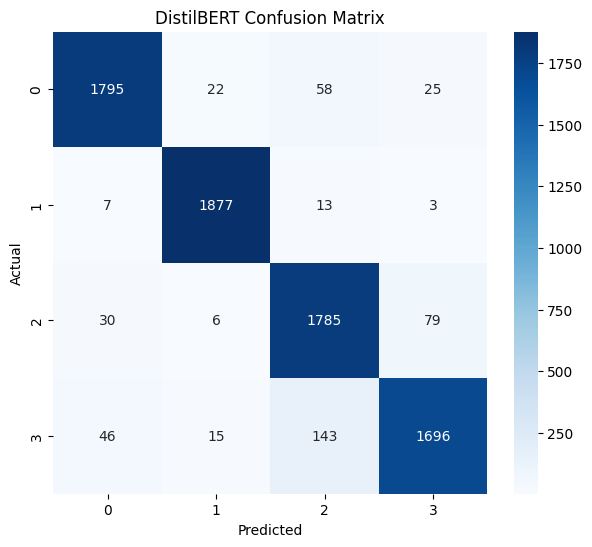

In [52]:
trues, preds = evaluate(model, test_loader)

print("Accuracy:", accuracy_score(trues, preds))
print(classification_report(trues, preds))

cm = confusion_matrix(trues, preds)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("DistilBERT Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [53]:
def predict(text):
    enc = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
    enc = {k: v.to(device) for k,v in enc.items()}
    logits = model(**enc).logits
    return torch.argmax(logits, dim=1).item()

print(predict("NASA announces new mission to Mars"))


3


In [54]:
model.save_pretrained("distilbert-agnews")
tokenizer.save_pretrained("distilbert-agnews")


('distilbert-agnews/tokenizer_config.json',
 'distilbert-agnews/special_tokens_map.json',
 'distilbert-agnews/vocab.txt',
 'distilbert-agnews/added_tokens.json',
 'distilbert-agnews/tokenizer.json')